# /// Accourding to the **Question3 Part(2-3)** 
# /// I used this code and apply changes **(Findding best Learning Rate)**. 

## /// **[06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb](https://https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/blob/master/homework/nbviewer.jupyter.org/github/Alireza-Akhavan/SRU-deeplearning-workshop/blob/master/06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb)**

In [ ]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

In [ ]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py -P LearningRateFinder

In [ ]:
from LearningRateFinder import learningratefinder

In [ ]:
# Import libraries and modules
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(123)  # for reproducibility
# Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

In [ ]:
# Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
# Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [ ]:
# test and validation set
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

In [ ]:
# Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
lrf = learningratefinder.LearningRateFinder(model)
lrf.find((x_train, y_train),1e-10, 1e+1)

Epoch 1/19
110/110 [==============================] - 4s 28ms/step - loss: 2.3046 - accuracy: 0.1009
Epoch 2/19
110/110 [==============================] - 3s 28ms/step - loss: 2.3061 - accuracy: 0.0863
Epoch 3/19
110/110 [==============================] - 3s 27ms/step - loss: 2.3036 - accuracy: 0.1000
Epoch 4/19
110/110 [==============================] - 3s 27ms/step - loss: 2.3044 - accuracy: 0.0937
Epoch 5/19
110/110 [==============================] - 3s 27ms/step - loss: 2.3044 - accuracy: 0.1000
Epoch 6/19
110/110 [==============================] - 3s 27ms/step - loss: 2.3036 - accuracy: 0.0966
Epoch 7/19
110/110 [==============================] - 3s 27ms/step - loss: 2.3013 - accuracy: 0.0943
Epoch 8/19
110/110 [==============================] - 3s 27ms/step - loss: 2.2973 - accuracy: 0.1060
Epoch 9/19
110/110 [==============================] - 3s 28ms/step - loss: 2.2875 - accuracy: 0.1186
Epoch 10/19
110/110 [==============================] - 3s 27ms/step - loss: 2.2206 - accura

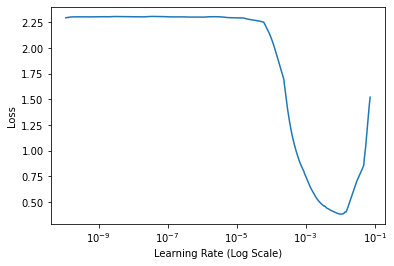

In [ ]:
lrf.plot_loss()

# **conclusion:**

# ✅✅✅ According to the plot above, the minimum occurs at 0.01 (10e-3) and,
# 0.0001 (10e-5) is just large enough for network to start learning.
# **So a good learning rate to use would be 0.001 (10e-4).** 